[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1f7u7dzwK0aUB5S0Mip_MjW8qv6QQ4OWS?usp=sharing)



## **Simple Visualizations (25%)**

##Tidy Data (.csv file) - To download

---



https://drive.google.com/file/d/1-821iM6XE-6uNxCnLSLEVejLAua8sS-m/view?usp=sharing



In [2]:
#read the final dataframe we created from tidy data

import pandas as pd

# Assuming your CSV file is named 'your_file.csv' and is in the current directory
df = pd.read_csv('/content/all_seasons.csv')

# Print the first few rows of the DataFrame to verify it's loaded correctly
print(df.head())


       gameId timeRemaining  periodNumber timeInPeriod  isGoal shotType  \
0  2016020001         18:49             1         1:11       0    wrist   
1  2016020001         17:07             1         2:53       0    wrist   
2  2016020001         15:59             1         4:01       0    wrist   
3  2016020001         15:14             1         4:46       0     slap   
4  2016020001         13:14             1         6:46       0    wrist   

   xCoord  yCoord shootingTeam  shotDistance  shootingTeamSide  \
0   -77.0     5.0  Maple Leafs     13.000000                 1   
1    86.0    13.0     Senators     13.341664                 0   
2    23.0   -38.0     Senators     76.157731                 0   
3    33.0   -15.0     Senators     57.974132                 0   
4   -34.0    28.0  Maple Leafs     61.717096                 1   

    shootingPlayer        goalieInNet zoneCode  
0     Mitch Marner     Craig Anderson        O  
1      Chris Kelly  Frederik Andersen        O  
2    

In [3]:
#print all column names

print(df.columns)

Index(['gameId', 'timeRemaining', 'periodNumber', 'timeInPeriod', 'isGoal',
       'shotType', 'xCoord', 'yCoord', 'shootingTeam', 'shotDistance',
       'shootingTeamSide', 'shootingPlayer', 'goalieInNet', 'zoneCode'],
      dtype='object')


# Question 1

**Produce a figure comparing the shot types over all teams (i.e. just aggregate all of the shots), in a season of your choosing. Overlay the number of goals overtop the number of shots. What appears to be the most dangerous type of shot? The most common type of shot? Why did you choose this figure? Add this figure and discussion to your blog post.**

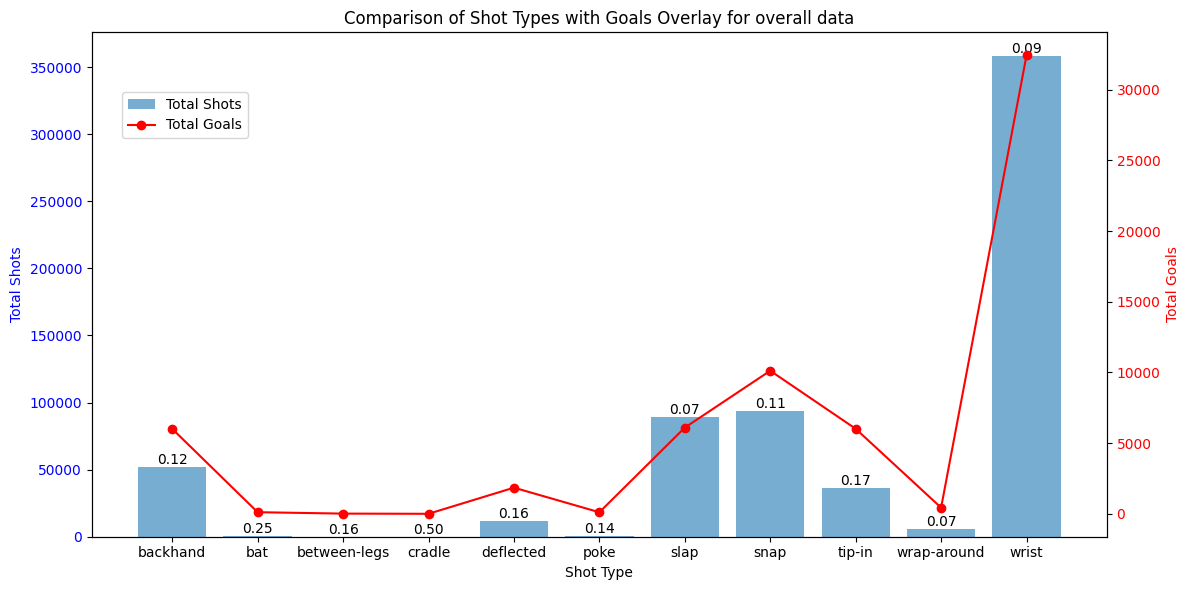

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Grouping by shotType to calculate total shots and goals
shot_data = df.groupby('shotType').agg(
    total_shots=('isGoal', 'count'),
    total_goals=('isGoal', 'sum')
).reset_index()

# Calculating goal-to-shot ratio
shot_data['goal_to_shot_ratio'] = shot_data['total_goals'] / shot_data['total_shots']

# Plotting the figure
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for total shots
ax1.bar(shot_data['shotType'], shot_data['total_shots'], alpha=0.6, label='Total Shots')
ax1.set_xlabel('Shot Type')
ax1.set_ylabel('Total Shots', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Overlay line plot for total goals
ax2 = ax1.twinx()
ax2.plot(shot_data['shotType'], shot_data['total_goals'], color='red', marker='o', label='Total Goals')
ax2.set_ylabel('Total Goals', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Adding ratio labels on the bars
for i, row in shot_data.iterrows():
    ax1.text(i, row['total_shots'], f"{row['goal_to_shot_ratio']:.2f}",
             ha='center', va='bottom')

# Adding legends and title
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.85))
plt.title('Comparison of Shot Types with Goals Overlay for overall data')

# Adjusting layout and showing the plot
plt.tight_layout()
plt.show()


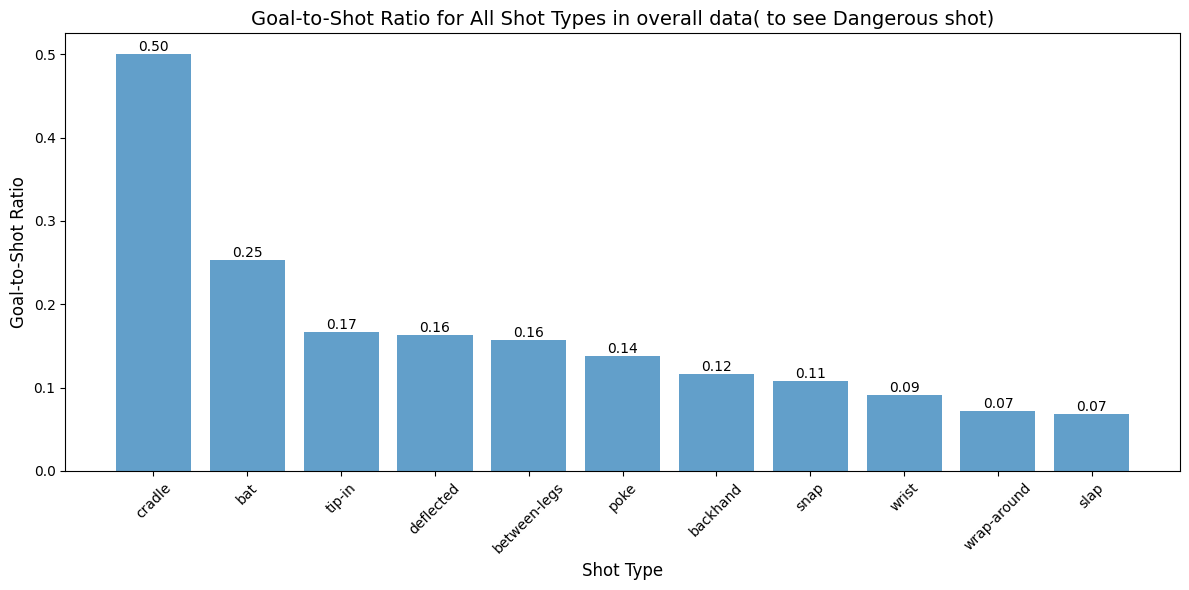

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the CSV has already been loaded into a DataFrame
# Ensure you have the correct file path or load it properly in Colab

# Grouping by 'shotType' to get total shots and goals for each type
shot_data = df.groupby('shotType').agg(
    total_shots=('isGoal', 'count'),
    total_goals=('isGoal', 'sum')
).reset_index()

# Calculating the goal-to-shot ratio
shot_data['goal_to_shot_ratio'] = shot_data['total_goals'] / shot_data['total_shots']

# Sorting the data by goal-to-shot ratio for better visualization
sorted_shot_data = shot_data.sort_values(by='goal_to_shot_ratio', ascending=False)

# Plotting the goal-to-shot ratio for all shot types
fig, ax = plt.subplots(figsize=(12, 6))

# Bar plot for goal-to-shot ratio across all shot types
bars = ax.bar(
    sorted_shot_data['shotType'],
    sorted_shot_data['goal_to_shot_ratio'],
    alpha=0.7
)

# Highlighting the most dangerous shot type (highest ratio)
most_dangerous_shot = sorted_shot_data.iloc[0]
for bar in bars:
    if bar.get_x() == sorted_shot_data[sorted_shot_data['shotType'] == most_dangerous_shot['shotType']].index[0]:
        bar.set_color('red')  # Highlight the most dangerous shot

# Adding text annotations for the goal-to-shot ratio
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height:.2f}",
        ha='center',
        va='bottom',
        fontsize=10
    )

# Adding labels and title
ax.set_xlabel('Shot Type', fontsize=12)
ax.set_ylabel('Goal-to-Shot Ratio', fontsize=12)
ax.set_title('Goal-to-Shot Ratio for All Shot Types in overall data( to see Dangerous shot)', fontsize=14)
plt.xticks(rotation=45)

# Displaying the plot
plt.tight_layout()
plt.show()


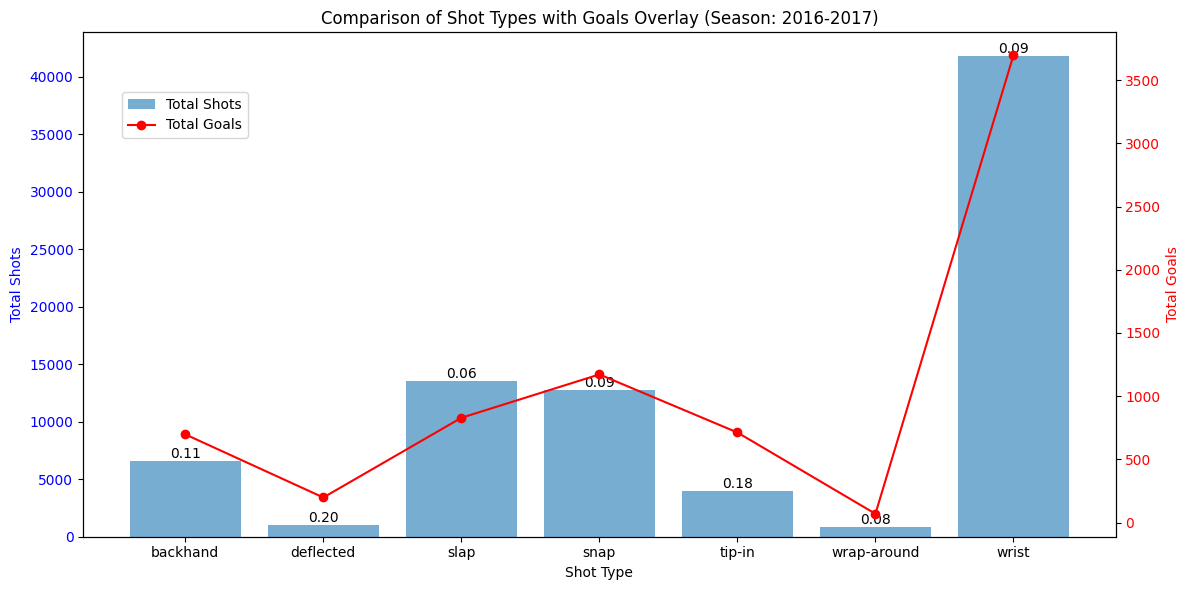

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Extracting the year from 'gameId' (first 4 characters)
df['year'] = df['gameId'].astype(str).str[:4].astype(int)

# Filtering the data for the 2016-2017 season (gameId starting with 2016)
df_season = df[(df['year'] == 2016)]

# Grouping by 'shotType' to calculate total shots and goals
shot_data = df_season.groupby('shotType').agg(
    total_shots=('isGoal', 'count'),
    total_goals=('isGoal', 'sum')
).reset_index()

# Calculating the goal-to-shot ratio
shot_data['goal_to_shot_ratio'] = shot_data['total_goals'] / shot_data['total_shots']

# Plotting the figure
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for total shots
ax1.bar(shot_data['shotType'], shot_data['total_shots'], alpha=0.6, label='Total Shots')
ax1.set_xlabel('Shot Type')
ax1.set_ylabel('Total Shots', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Overlay line plot for total goals
ax2 = ax1.twinx()
ax2.plot(shot_data['shotType'], shot_data['total_goals'], color='red', marker='o', label='Total Goals')
ax2.set_ylabel('Total Goals', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Adding ratio labels on the bars
for i, row in shot_data.iterrows():
    ax1.text(i, row['total_shots'], f"{row['goal_to_shot_ratio']:.2f}",
             ha='center', va='bottom')

# Adding legends and title
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.85))
plt.title('Comparison of Shot Types with Goals Overlay (Season: 2016-2017)')

# Adjusting layout and showing the plot
plt.tight_layout()
plt.show()


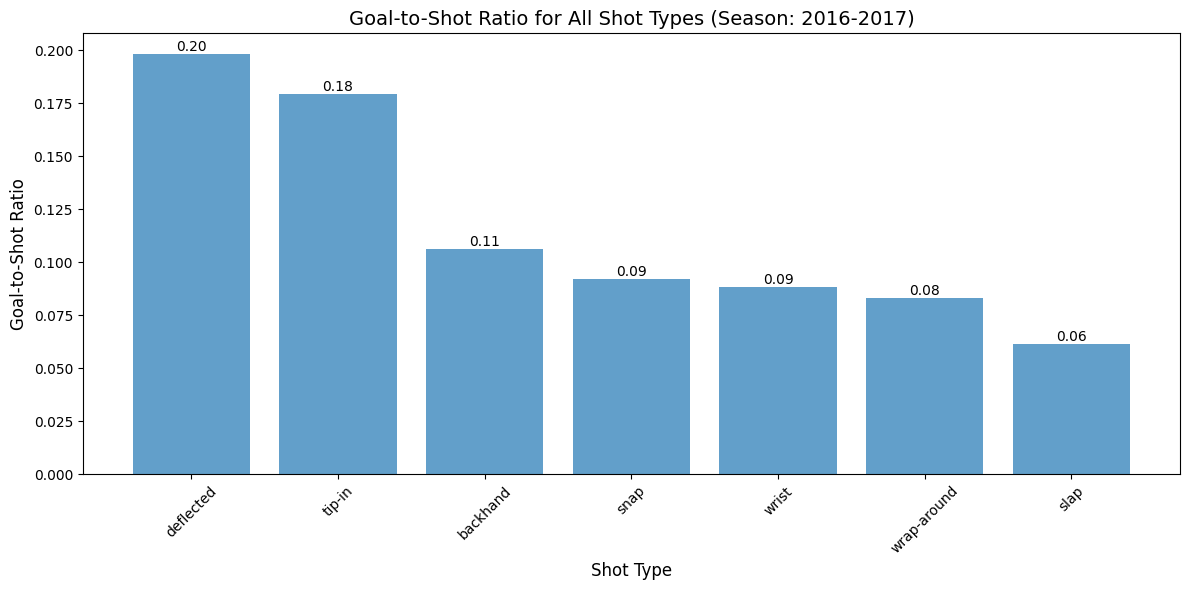

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Extracting the year from 'gameId' (first 4 characters)
df['year'] = df['gameId'].astype(str).str[:4].astype(int)

# Filtering the data for the 2016-2017 season (gameId starting with 2016)
df_season = df[df['year'] == 2016]

# Grouping by 'shotType' to calculate total shots and goals
shot_data = df_season.groupby('shotType').agg(
    total_shots=('isGoal', 'count'),
    total_goals=('isGoal', 'sum')
).reset_index()

# Calculating the goal-to-shot ratio
shot_data['goal_to_shot_ratio'] = shot_data['total_goals'] / shot_data['total_shots']

# Sorting the data by goal-to-shot ratio for better visualization
sorted_shot_data = shot_data.sort_values(by='goal_to_shot_ratio', ascending=False)

# Plotting the goal-to-shot ratio for all shot types
fig, ax = plt.subplots(figsize=(12, 6))

# Bar plot for goal-to-shot ratio across all shot types
bars = ax.bar(
    sorted_shot_data['shotType'],
    sorted_shot_data['goal_to_shot_ratio'],
    alpha=0.7
)

# Highlighting the most dangerous shot type (highest ratio)
most_dangerous_shot = sorted_shot_data.iloc[0]
for bar in bars:
    if bar.get_x() == sorted_shot_data[sorted_shot_data['shotType'] == most_dangerous_shot['shotType']].index[0]:
        bar.set_color('red')  # Highlight the most dangerous shot

# Adding text annotations for the goal-to-shot ratio
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height:.2f}",
        ha='center',
        va='bottom',
        fontsize=10
    )

# Adding labels and title
ax.set_xlabel('Shot Type', fontsize=12)
ax.set_ylabel('Goal-to-Shot Ratio', fontsize=12)
ax.set_title('Goal-to-Shot Ratio for All Shot Types (Season: 2016-2017)', fontsize=14)
plt.xticks(rotation=45)

# Displaying the plot
plt.tight_layout()
plt.show()


## Question 2

**What is the relationship between the distance a shot was taken and the chance it was a goal? Produce a figure for each season between 2018-19 to 2020-21 to answer this, and add it to your blog post along with a couple of sentences describing your figure. Has there been much change over the past three seasons? Why did you choose this figure?**


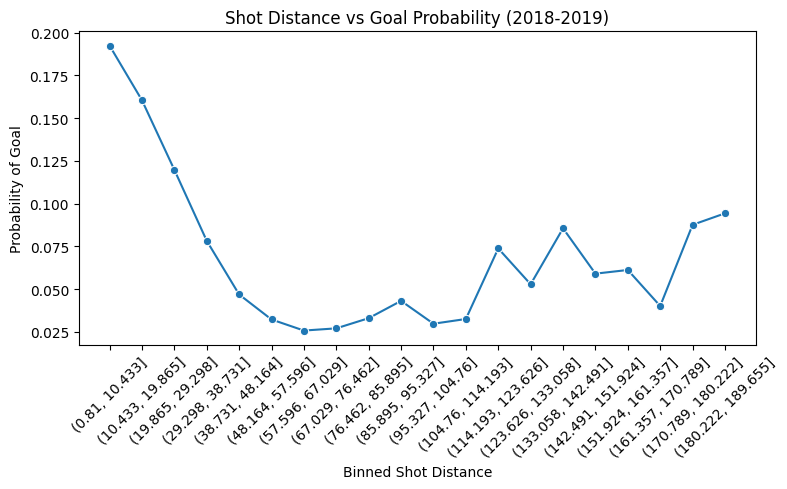

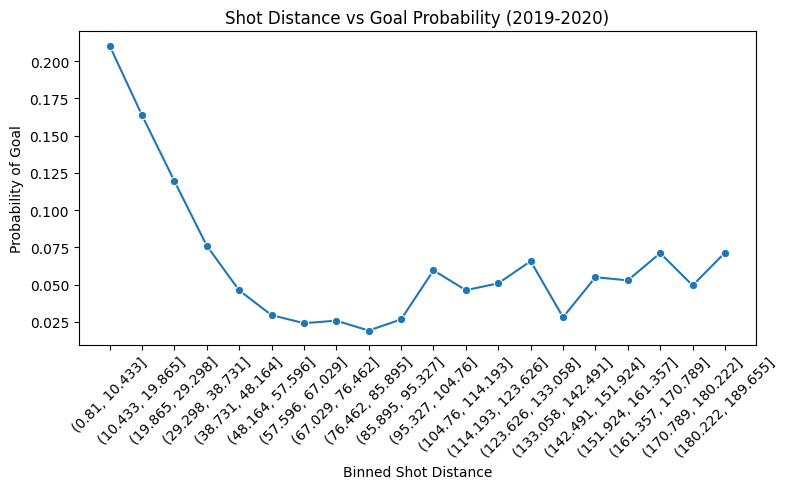

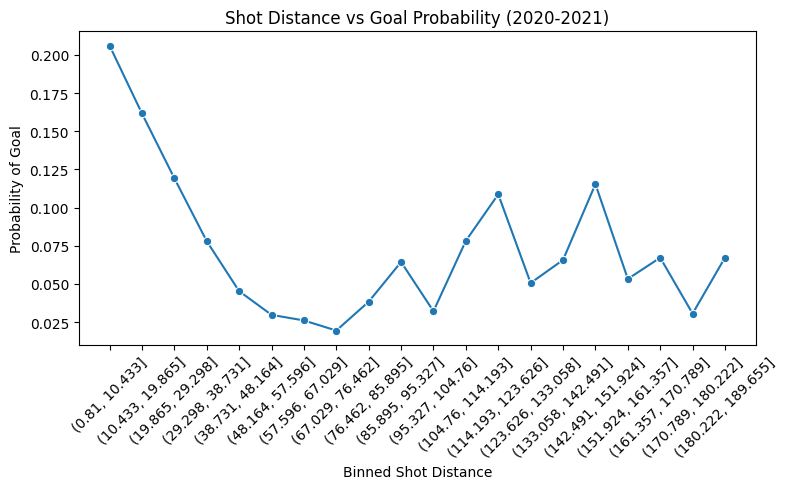

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the year from 'gameId' (first 4 characters) and convert to integer
df['year'] = df['gameId'].astype(str).str[:4].astype(int)

# Filter data for seasons between 2018-19 and 2020-21
df_filtered = df.loc[(df['year'] >= 2018) & (df['year'] <= 2020)].copy()

# Ensure 'isGoal' is treated as a binary outcome
df_filtered['isGoal'] = df_filtered['isGoal'].astype(int)

# Use pd.cut with proper handling of categorical bins
df_filtered['binned_distance'] = pd.cut(
    df_filtered['shotDistance'],
    bins=20,
    include_lowest=True
)

# Loop over each season and generate the plot
seasons = sorted(df_filtered['year'].unique())
for season in seasons:
    # Filter data for the specific season
    season_data = df_filtered[df_filtered['year'] == season]

    # Group by binned distance to compute the goal probability
    season_summary = season_data.groupby('binned_distance', observed=True).agg(
        goal_probability=('isGoal', 'mean'),
        shot_count=('isGoal', 'count')
    ).reset_index()

    # Convert bins to string for easier plotting
    season_summary['binned_distance'] = season_summary['binned_distance'].astype(str)

    # Plotting the goal probability vs shot distance
    plt.figure(figsize=(8, 5))
    sns.lineplot(data=season_summary, x='binned_distance', y='goal_probability', marker='o')
    plt.title(f'Shot Distance vs Goal Probability ({season}-{season+1})')
    plt.xlabel('Binned Shot Distance')
    plt.ylabel('Probability of Goal')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


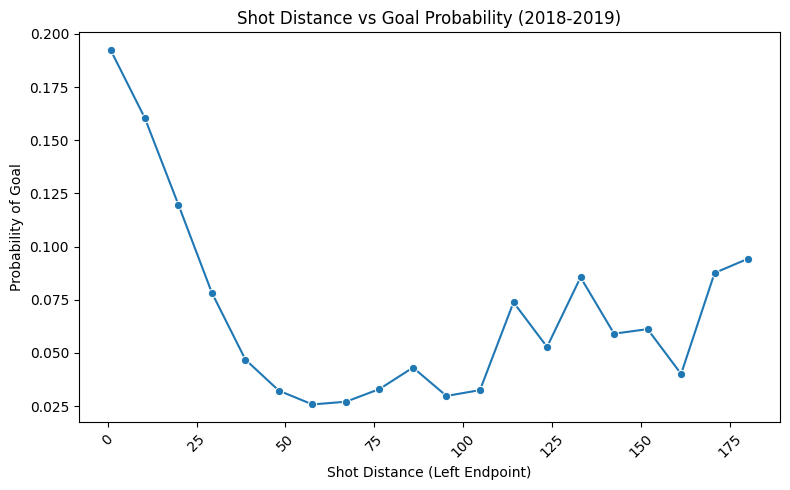

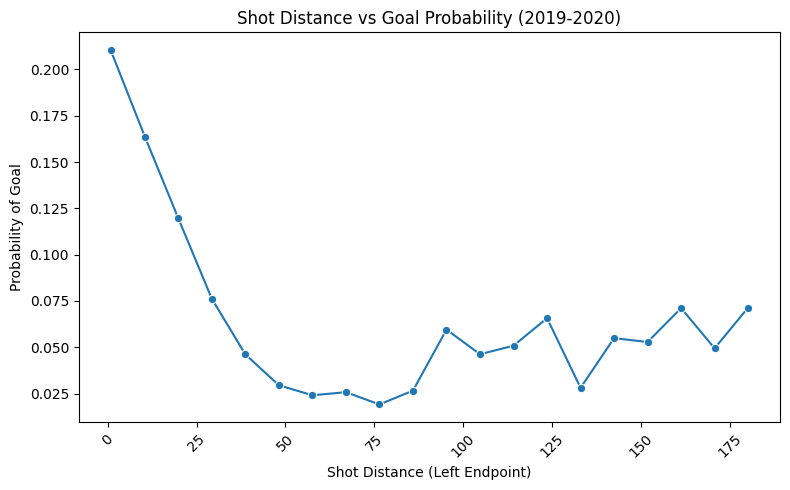

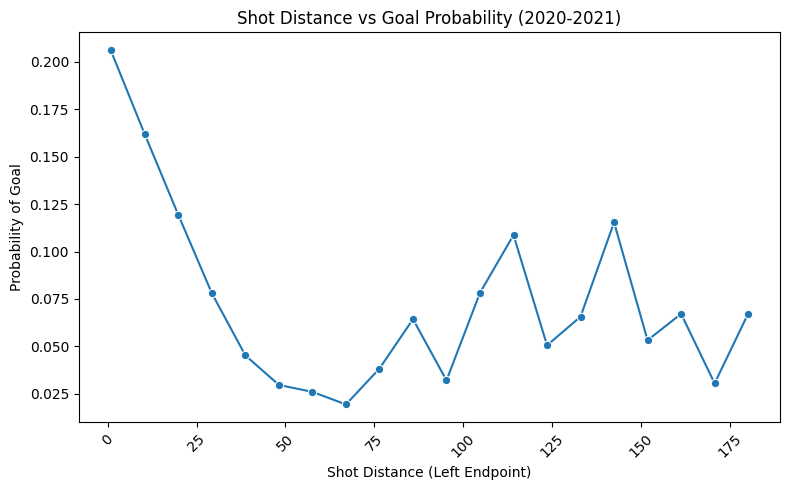

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the year from 'gameId' (first 4 characters) and convert to integer
df['year'] = df['gameId'].astype(str).str[:4].astype(int)

# Filter data for seasons between 2018-19 and 2020-21
df_filtered = df.loc[(df['year'] >= 2018) & (df['year'] <= 2020)].copy()

# Ensure 'isGoal' is treated as a binary outcome
df_filtered['isGoal'] = df_filtered['isGoal'].astype(int)

# Use pd.cut with proper handling of categorical bins
df_filtered['binned_distance'] = pd.cut(
    df_filtered['shotDistance'],
    bins=20,
    include_lowest=True
)

# Function to extract the left endpoint (or any representative value)
def get_bin_left_endpoint(bin_interval):
    return round(bin_interval.left, 2)  # Round for better visualization

# Loop over each season and generate the plot
seasons = sorted(df_filtered['year'].unique())
for season in seasons:
    # Filter data for the specific season
    season_data = df_filtered[df_filtered['year'] == season]

    # Group by binned distance to compute the goal probability
    season_summary = season_data.groupby('binned_distance', observed=True).agg(
        goal_probability=('isGoal', 'mean'),
        shot_count=('isGoal', 'count')
    ).reset_index()

    # Replace bin intervals with a single representative value (left endpoint)
    season_summary['binned_distance'] = season_summary['binned_distance'].apply(get_bin_left_endpoint)

    # Plotting the goal probability vs shot distance
    plt.figure(figsize=(8, 5))
    sns.lineplot(data=season_summary, x='binned_distance', y='goal_probability', marker='o')
    plt.title(f'Shot Distance vs Goal Probability ({season}-{season+1})')
    plt.xlabel('Shot Distance (Left Endpoint)')
    plt.ylabel('Probability of Goal')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


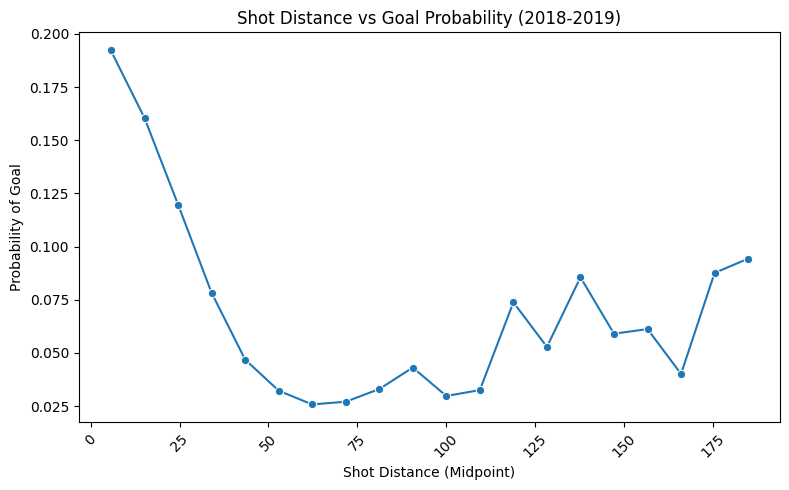

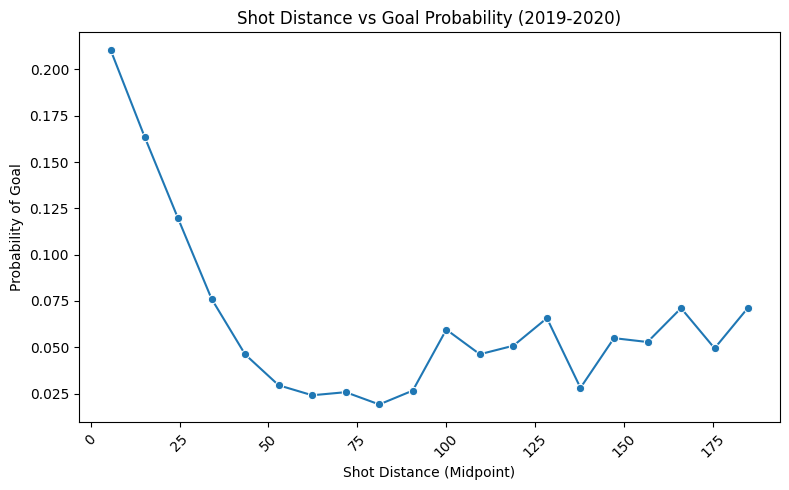

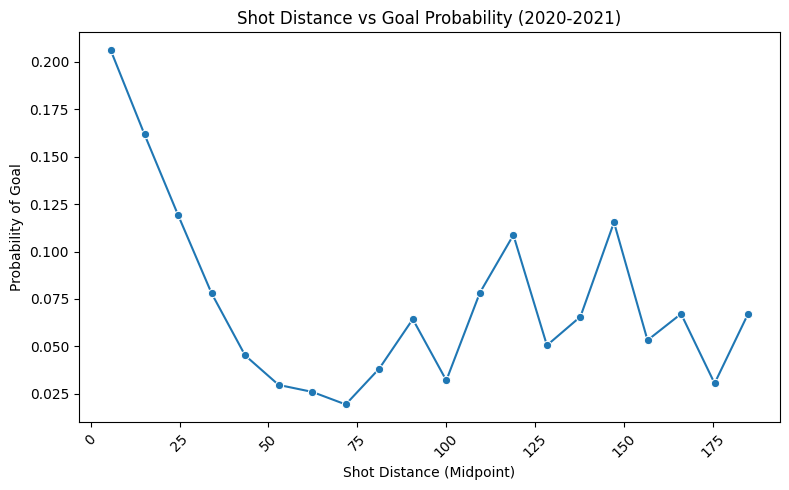

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the year from 'gameId' (first 4 characters) and convert to integer
df['year'] = df['gameId'].astype(str).str[:4].astype(int)

# Filter data for seasons between 2018-19 and 2020-21
df_filtered = df.loc[(df['year'] >= 2018) & (df['year'] <= 2020)].copy()

# Ensure 'isGoal' is treated as a binary outcome
df_filtered['isGoal'] = df_filtered['isGoal'].astype(int)

# Use pd.cut with proper handling of categorical bins
df_filtered['binned_distance'] = pd.cut(
    df_filtered['shotDistance'],
    bins=20,
    include_lowest=True
)

# Function to calculate bin midpoints
def get_bin_midpoint(bin_interval):
    return (bin_interval.left + bin_interval.right) / 2

# Loop over each season and generate the plot
seasons = sorted(df_filtered['year'].unique())
for season in seasons:
    # Filter data for the specific season
    season_data = df_filtered[df_filtered['year'] == season]

    # Group by binned distance to compute the goal probability
    season_summary = season_data.groupby('binned_distance', observed=True).agg(
        goal_probability=('isGoal', 'mean'),
        shot_count=('isGoal', 'count')
    ).reset_index()

    # Replace bin intervals with midpoints for cleaner x-axis labels
    season_summary['binned_distance'] = season_summary['binned_distance'].apply(get_bin_midpoint)

    # Plotting the goal probability vs shot distance
    plt.figure(figsize=(8, 5))
    sns.lineplot(data=season_summary, x='binned_distance', y='goal_probability', marker='o')
    plt.title(f'Shot Distance vs Goal Probability ({season}-{season+1})')
    plt.xlabel('Shot Distance (Midpoint)')
    plt.ylabel('Probability of Goal')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


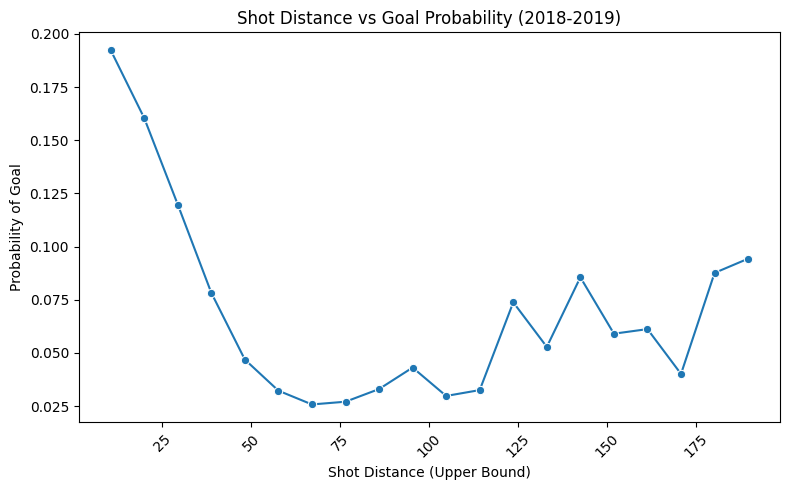

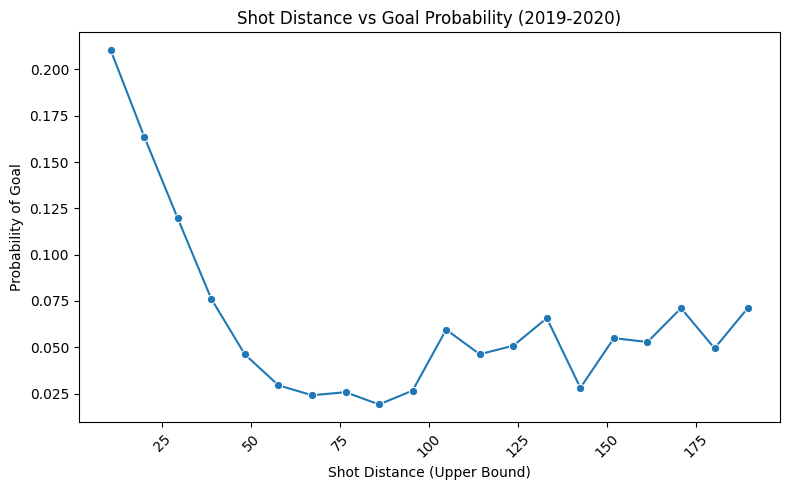

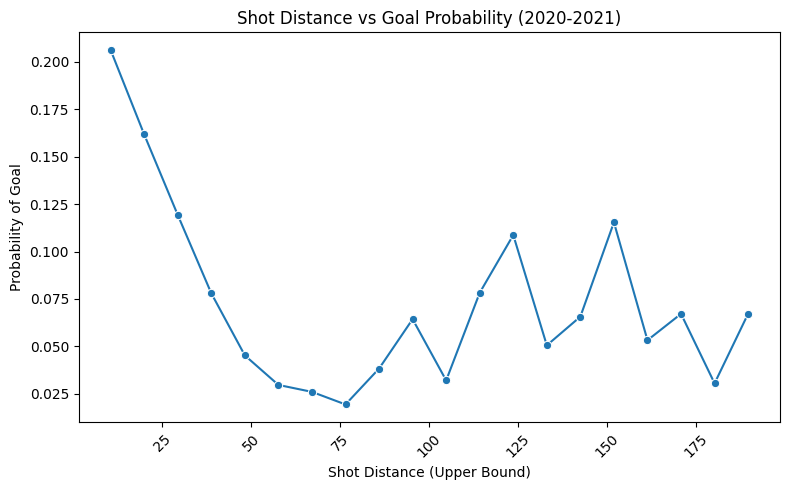

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the year from 'gameId' (first 4 characters) and convert to integer
df['year'] = df['gameId'].astype(str).str[:4].astype(int)

# Filter data for seasons between 2018-19 and 2020-21
df_filtered = df.loc[(df['year'] >= 2018) & (df['year'] <= 2020)].copy()

# Ensure 'isGoal' is treated as a binary outcome
df_filtered['isGoal'] = df_filtered['isGoal'].astype(int)

# Use pd.cut with proper handling of categorical bins
df_filtered['binned_distance'] = pd.cut(
    df_filtered['shotDistance'],
    bins=20,
    include_lowest=True
)

# Function to extract the right endpoint of each bin
def get_bin_right_endpoint(bin_interval):
    return bin_interval.right

# Loop over each season and generate the plot
seasons = sorted(df_filtered['year'].unique())
for season in seasons:
    # Filter data for the specific season
    season_data = df_filtered[df_filtered['year'] == season]

    # Group by binned distance to compute the goal probability
    season_summary = season_data.groupby('binned_distance', observed=True).agg(
        goal_probability=('isGoal', 'mean'),
        shot_count=('isGoal', 'count')
    ).reset_index()

    # Replace bin intervals with their right endpoints
    season_summary['binned_distance'] = season_summary['binned_distance'].apply(get_bin_right_endpoint)

    # Plotting the goal probability vs shot distance
    plt.figure(figsize=(8, 5))
    sns.lineplot(data=season_summary, x='binned_distance', y='goal_probability', marker='o')
    plt.title(f'Shot Distance vs Goal Probability ({season}-{season+1})')
    plt.xlabel('Shot Distance (Upper Bound)')
    plt.ylabel('Probability of Goal')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


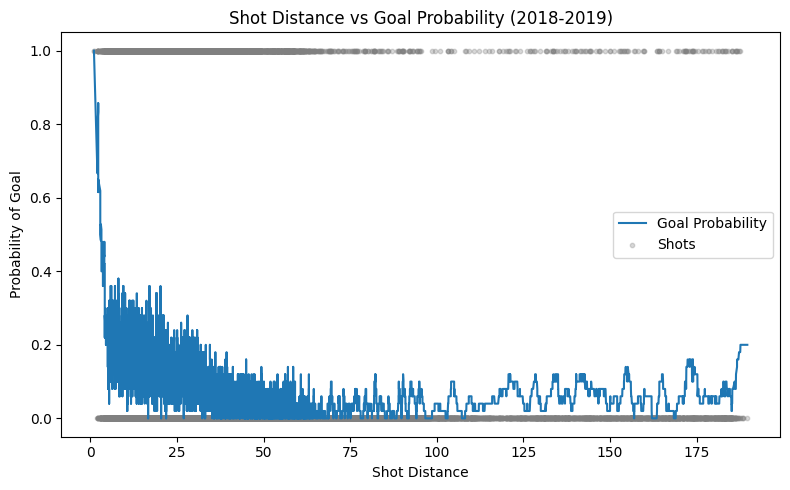

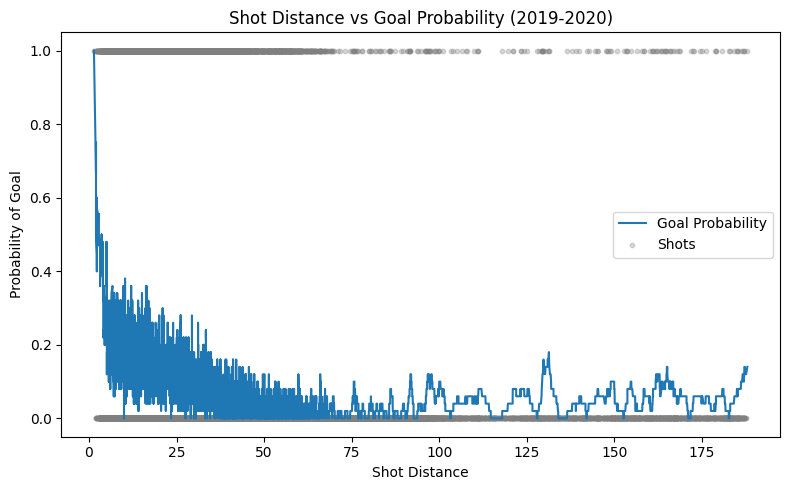

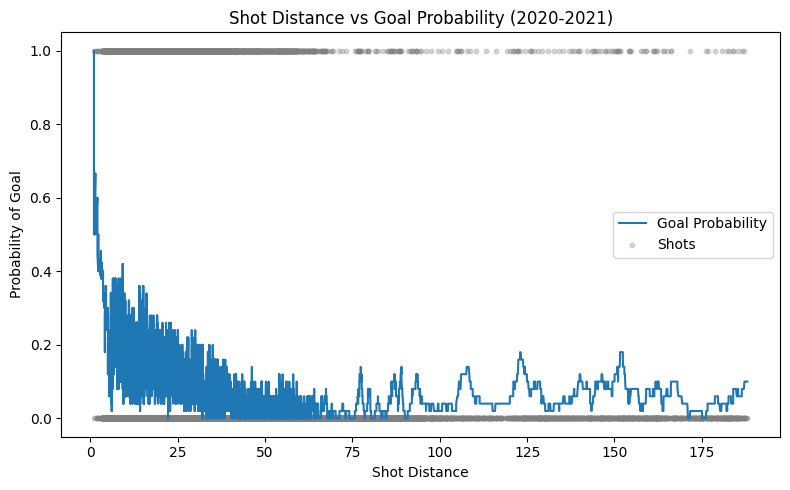

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract the year from 'gameId' (first 4 characters) and convert to integer
df['year'] = df['gameId'].astype(str).str[:4].astype(int)

# Filter data for seasons between 2018-19 and 2020-21
df_filtered = df.loc[(df['year'] >= 2018) & (df['year'] <= 2020)].copy()

# Ensure 'isGoal' is treated as a binary outcome
df_filtered['isGoal'] = df_filtered['isGoal'].astype(int)

# Loop over each season and generate the plot
seasons = sorted(df_filtered['year'].unique())
for season in seasons:
    # Filter data for the specific season
    season_data = df_filtered[df_filtered['year'] == season]

    # Sort by shotDistance for rolling average
    season_data = season_data.sort_values('shotDistance')

    # Compute rolling average with a window of 50 shots
    season_data['rolling_goal_prob'] = season_data['isGoal'].rolling(window=50, min_periods=1).mean()

    # Plot the smoothed goal probability
    plt.figure(figsize=(8, 5))
    plt.plot(season_data['shotDistance'], season_data['rolling_goal_prob'], label='Goal Probability')
    plt.scatter(season_data['shotDistance'], season_data['isGoal'], alpha=0.3, s=10, color='gray', label='Shots')
    plt.title(f'Shot Distance vs Goal Probability ({season}-{season+1})')
    plt.xlabel('Shot Distance')
    plt.ylabel('Probability of Goal')
    plt.legend()
    plt.tight_layout()
    plt.show()


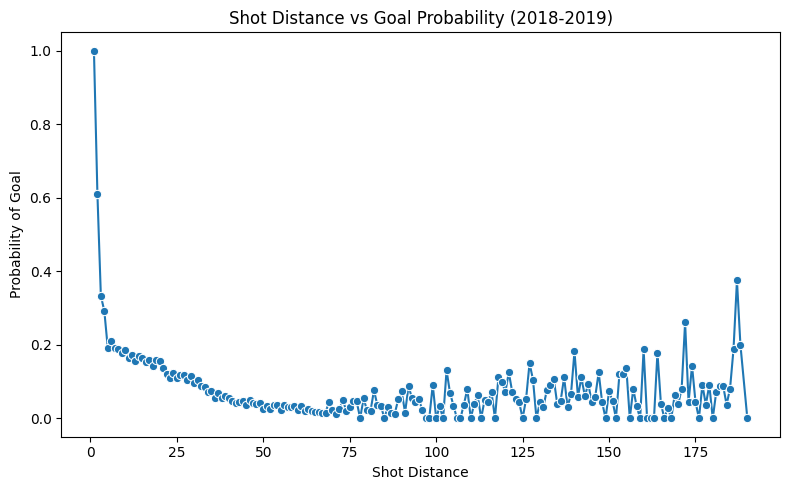

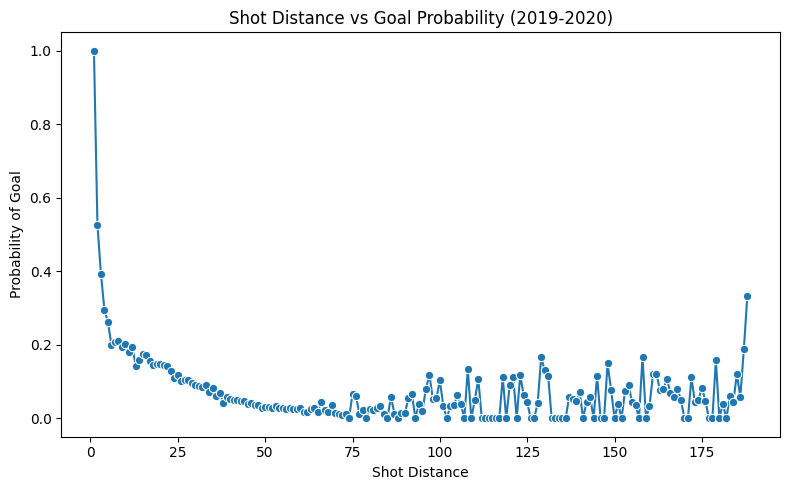

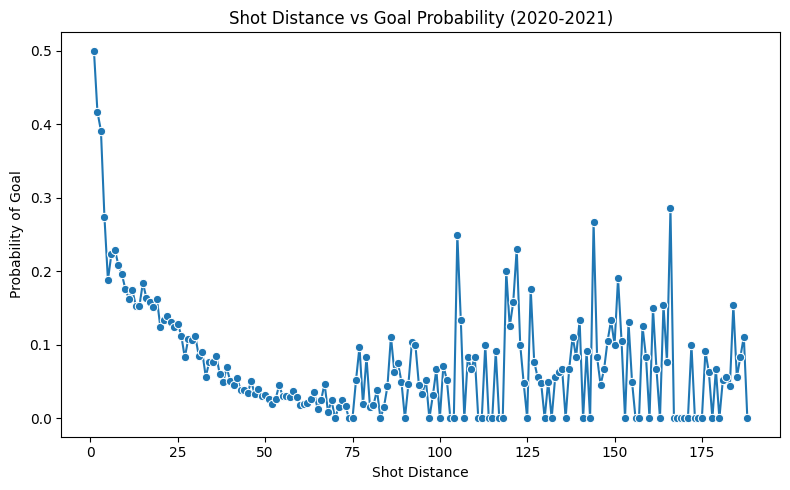

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the year from 'gameId' (first 4 characters) and convert to integer
df['year'] = df['gameId'].astype(str).str[:4].astype(int)

# Filter data for seasons between 2018-19 and 2020-21
df_filtered = df.loc[(df['year'] >= 2018) & (df['year'] <= 2020)].copy()

# Ensure 'isGoal' is treated as a binary outcome
df_filtered['isGoal'] = df_filtered['isGoal'].astype(int)

# Loop over each season and generate the plot
seasons = sorted(df_filtered['year'].unique())
for season in seasons:
    # Filter data for the specific season
    season_data = df_filtered[df_filtered['year'] == season]

    # Group by shot distance rounded to the nearest integer
    season_summary = season_data.groupby(season_data['shotDistance'].round()).agg(
        goal_probability=('isGoal', 'mean'),
        shot_count=('isGoal', 'count')
    ).reset_index()

    # Plot the goal probability vs shot distance
    plt.figure(figsize=(8, 5))
    sns.lineplot(data=season_summary, x='shotDistance', y='goal_probability', marker='o')
    plt.title(f'Shot Distance vs Goal Probability ({season}-{season+1})')
    plt.xlabel('Shot Distance')
    plt.ylabel('Probability of Goal')
    plt.tight_layout()
    plt.show()


<ipython-input-17-c82e81fce538>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_summary, x='binned_distance', y='goal_probability', palette='Blues_d')


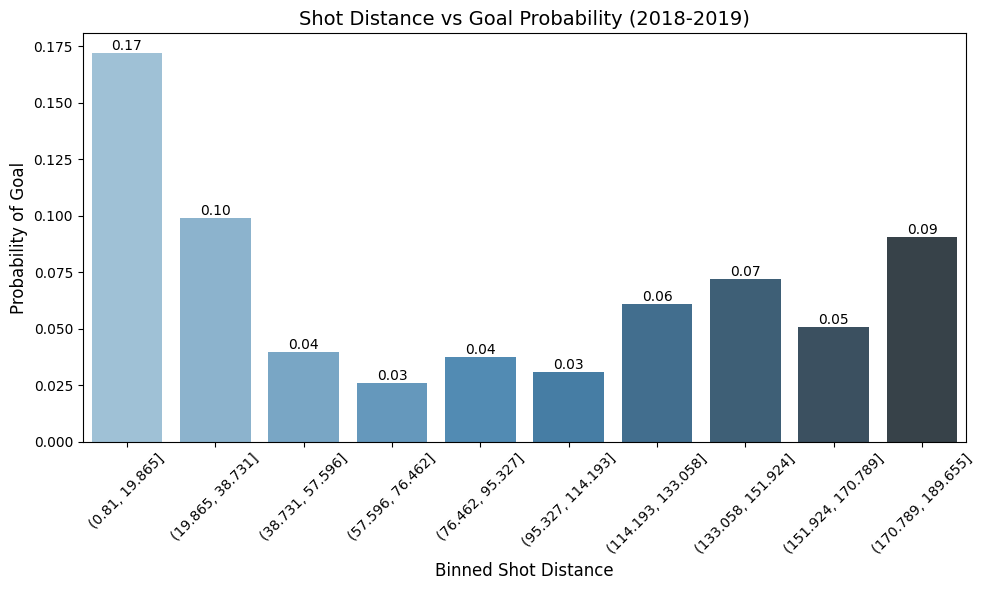

<ipython-input-17-c82e81fce538>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_summary, x='binned_distance', y='goal_probability', palette='Blues_d')


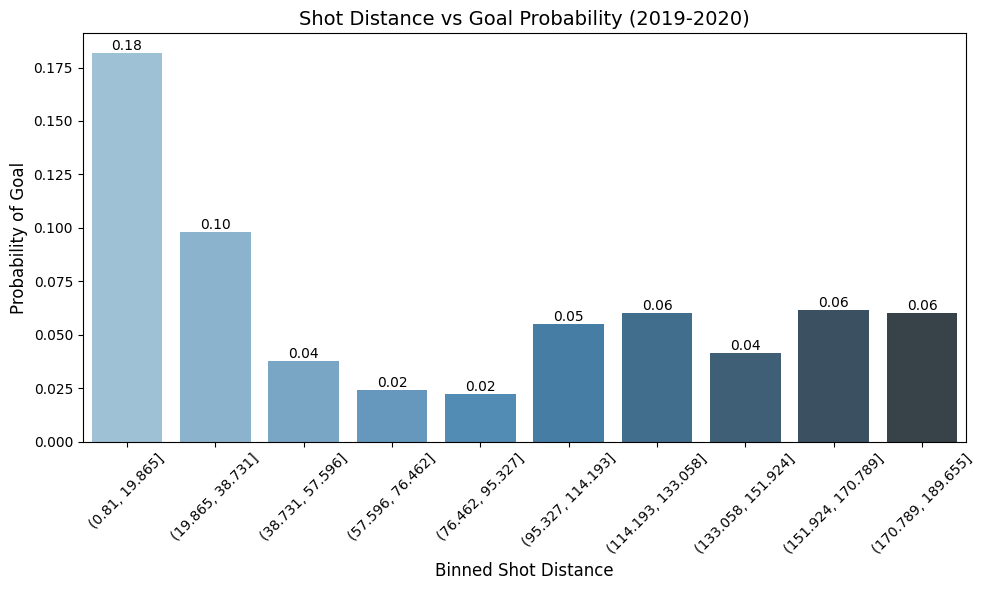

<ipython-input-17-c82e81fce538>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_summary, x='binned_distance', y='goal_probability', palette='Blues_d')


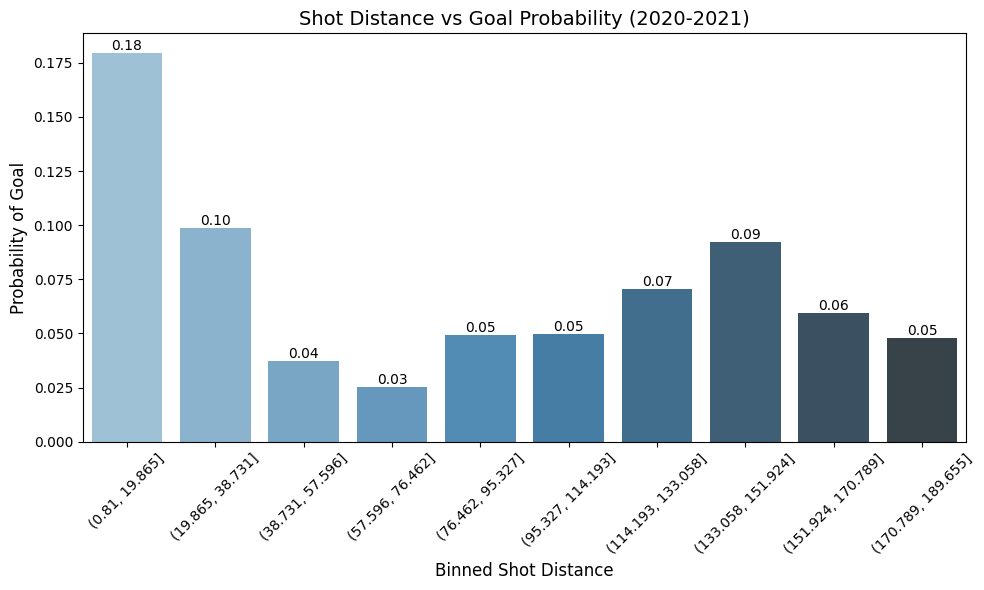

<ipython-input-17-c82e81fce538>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_summary, x='binned_distance', y='goal_probability', palette='Blues_d')


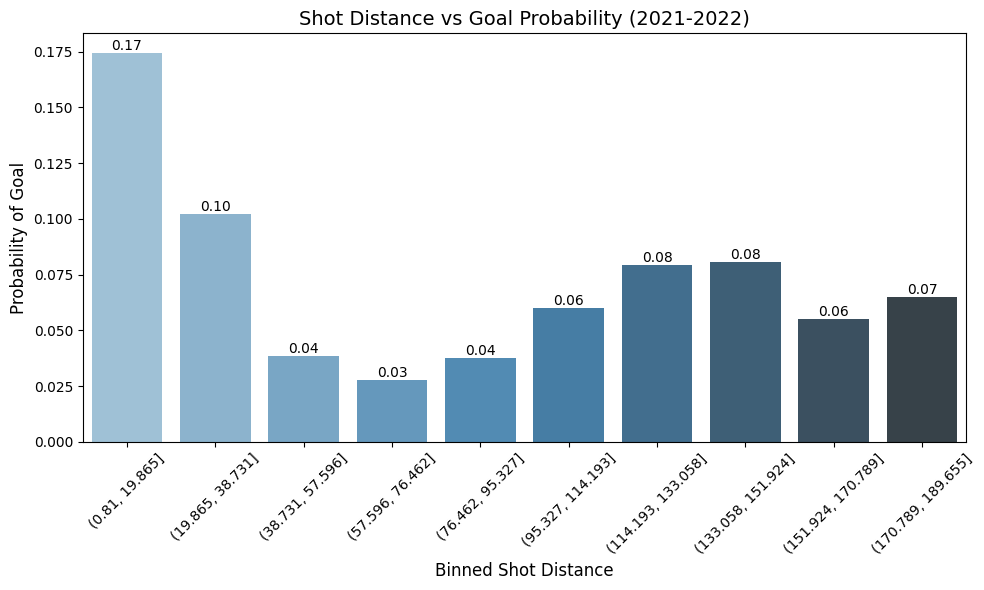

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the year from 'gameId' and convert to integer
df['year'] = df['gameId'].astype(str).str[:4].astype(int)

# Filter data for seasons between 2018-19 and 2020-21
df_filtered = df.loc[(df['year'] >= 2018) & (df['year'] <= 2021)].copy()

# Ensure 'isGoal' is binary
df_filtered['isGoal'] = df_filtered['isGoal'].astype(int)

# Bin shot distances into categories
df_filtered['binned_distance'] = pd.cut(df_filtered['shotDistance'], bins=10, include_lowest=True)

# Loop through each season and generate bar plots
seasons = sorted(df_filtered['year'].unique())
for season in seasons:
    # Filter season data
    season_data = df_filtered[df_filtered['year'] == season]

    # Group by binned distance to compute goal probabilities
    season_summary = season_data.groupby('binned_distance', observed=True).agg(
        goal_probability=('isGoal', 'mean'),
        shot_count=('isGoal', 'count')
    ).reset_index()

    # Convert binned distances to strings for easier plotting
    season_summary['binned_distance'] = season_summary['binned_distance'].astype(str)

    # Plotting a bar chart for goal probability
    plt.figure(figsize=(10, 6))
    sns.barplot(data=season_summary, x='binned_distance', y='goal_probability', palette='Blues_d')

    # Add data labels on top of the bars
    for index, row in season_summary.iterrows():
        plt.text(index, row['goal_probability'], f"{row['goal_probability']:.2f}",
                 ha='center', va='bottom', fontsize=10)

    # Set plot labels and title
    plt.title(f'Shot Distance vs Goal Probability ({season}-{season + 1})', fontsize=14)
    plt.xlabel('Binned Shot Distance', fontsize=12)
    plt.ylabel('Probability of Goal', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Display the plot
    plt.show()


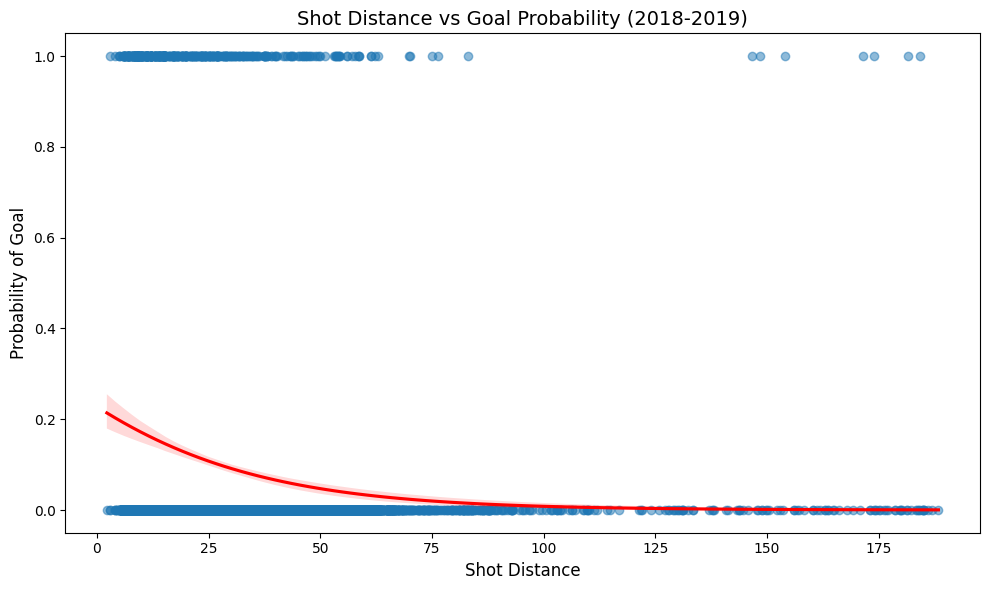

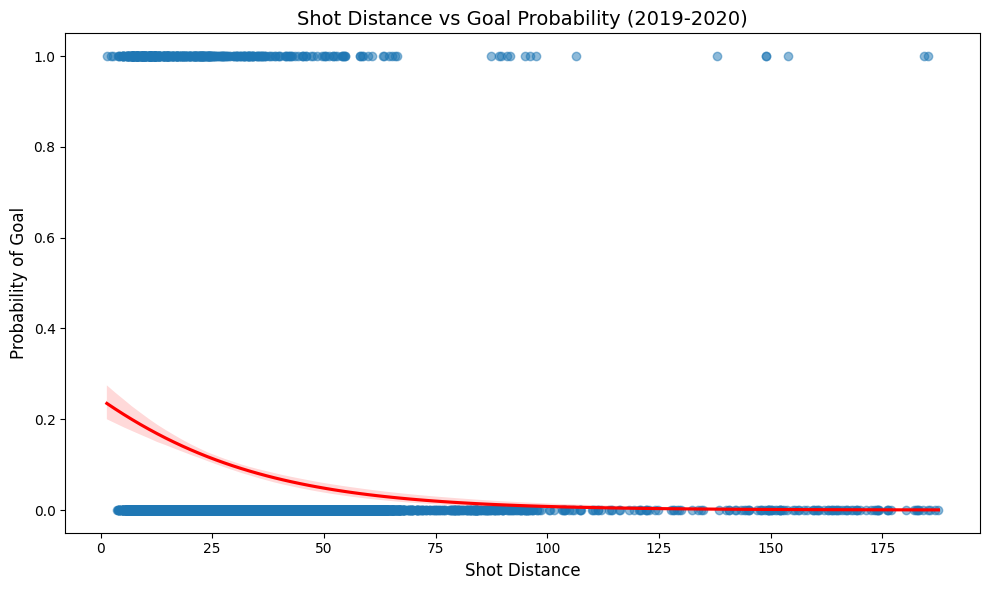

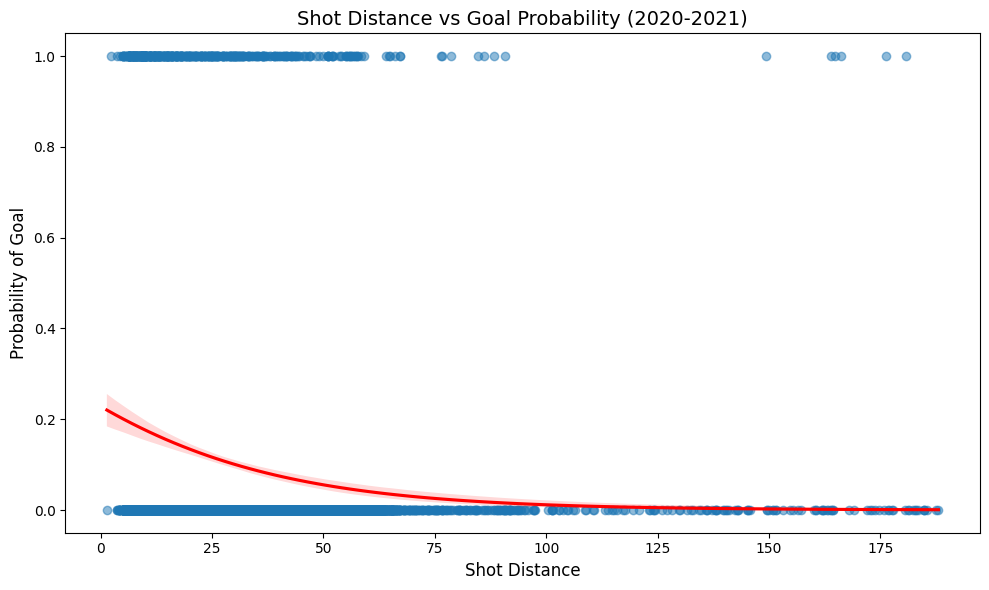

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the year from 'gameId' and convert to integer
df['year'] = df['gameId'].astype(str).str[:4].astype(int)

# Filter data for seasons between 2018-19 and 2020-21
df_filtered = df.loc[(df['year'] >= 2018) & (df['year'] <= 2021)].copy()

# Ensure 'isGoal' is binary
df_filtered['isGoal'] = df_filtered['isGoal'].astype(int)

# Randomly sample 5000 rows per season for faster execution
sample_size = 5000
seasons = sorted(df_filtered['year'].unique())

for season in seasons:
    season_data = df_filtered[df_filtered['year'] == season].sample(n=sample_size, random_state=42)

    # Plotting a scatter plot with logistic regression
    plt.figure(figsize=(10, 6))
    sns.regplot(
        data=season_data,
        x='shotDistance',
        y='isGoal',
        logistic=True,
        scatter_kws={'alpha': 0.5},
        line_kws={'color': 'red'}
    )

    # Set plot labels and title
    plt.title(f'Shot Distance vs Goal Probability ({season}-{season + 1})', fontsize=14)
    plt.xlabel('Shot Distance', fontsize=12)
    plt.ylabel('Probability of Goal', fontsize=12)
    plt.tight_layout()

    # Display the plot
    plt.show()


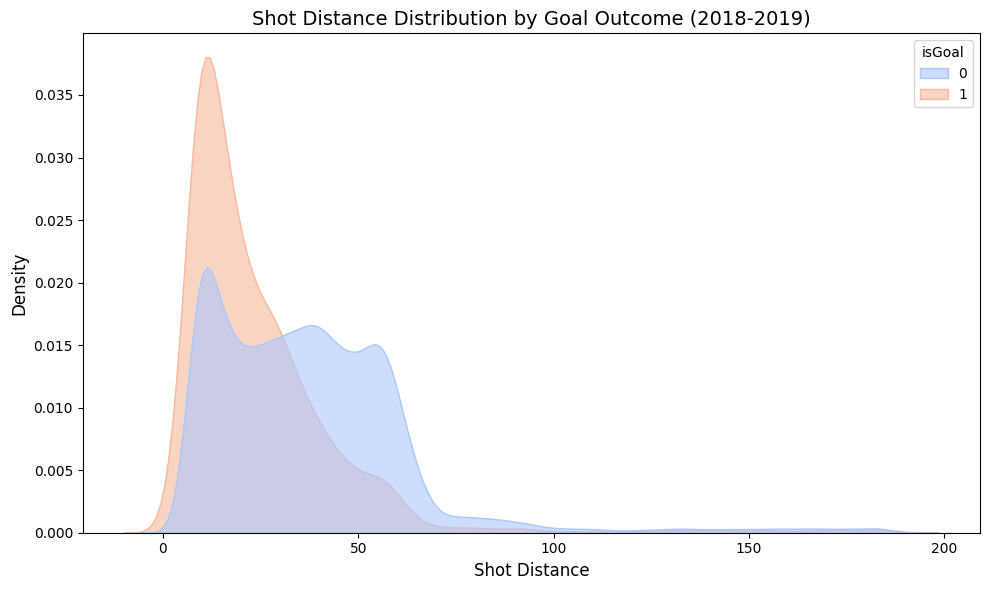

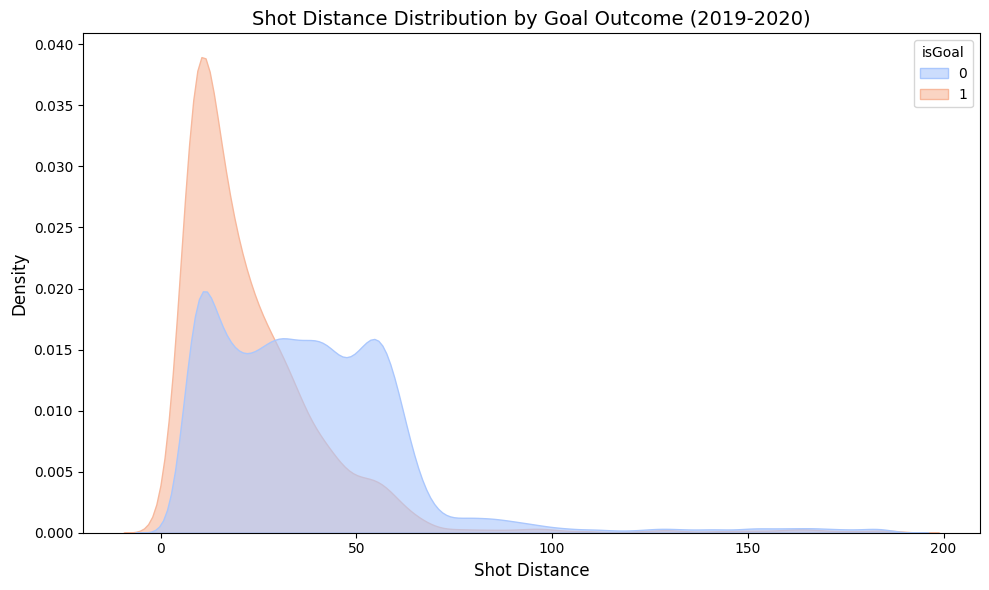

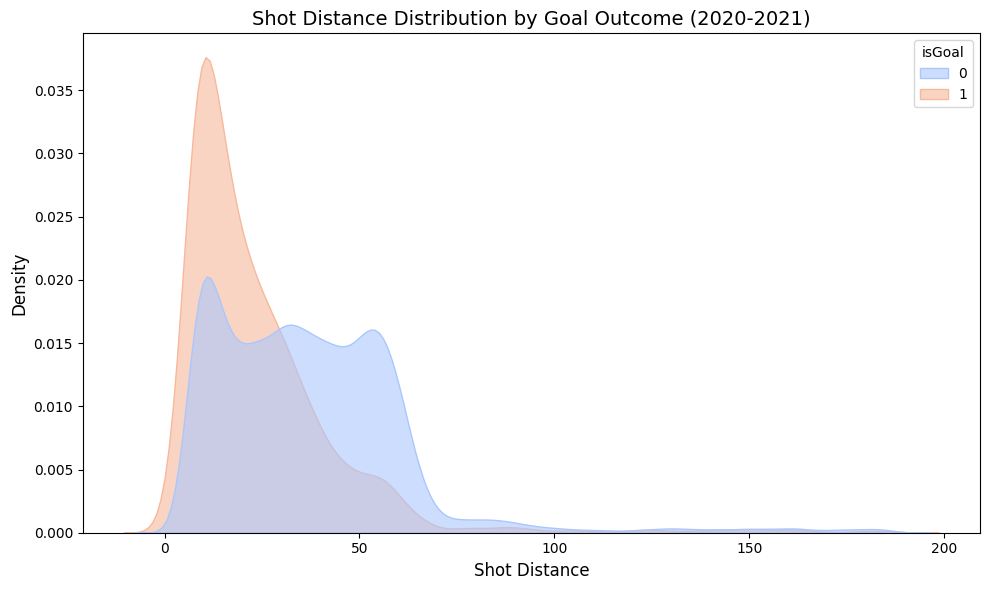

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the year from 'gameId' and convert to integer
df['year'] = df['gameId'].astype(str).str[:4].astype(int)

# Filter data for seasons between 2018-19 and 2020-21
df_filtered = df.loc[(df['year'] >= 2018) & (df['year'] <= 2020)].copy()

# Ensure 'isGoal' is binary
df_filtered['isGoal'] = df_filtered['isGoal'].astype(int)

# Plotting KDE plot for each season
seasons = sorted(df_filtered['year'].unique())
for season in seasons:
    season_data = df_filtered[df_filtered['year'] == season]

    # KDE plot for shot distance, separated by goal/no goal
    plt.figure(figsize=(10, 6))
    sns.kdeplot(
        data=season_data,
        x='shotDistance',
        hue='isGoal',
        common_norm=False,
        fill=True,
        palette='coolwarm',
        alpha=0.6
    )

    # Set plot labels and title
    plt.title(f'Shot Distance Distribution by Goal Outcome ({season}-{season + 1})', fontsize=14)
    plt.xlabel('Shot Distance', fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.tight_layout()

    # Display the plot
    plt.show()


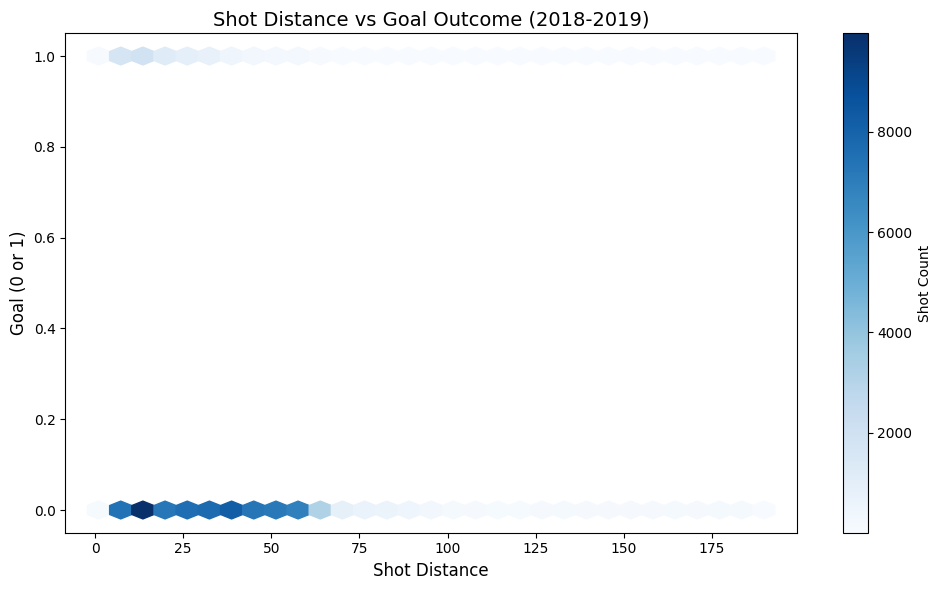

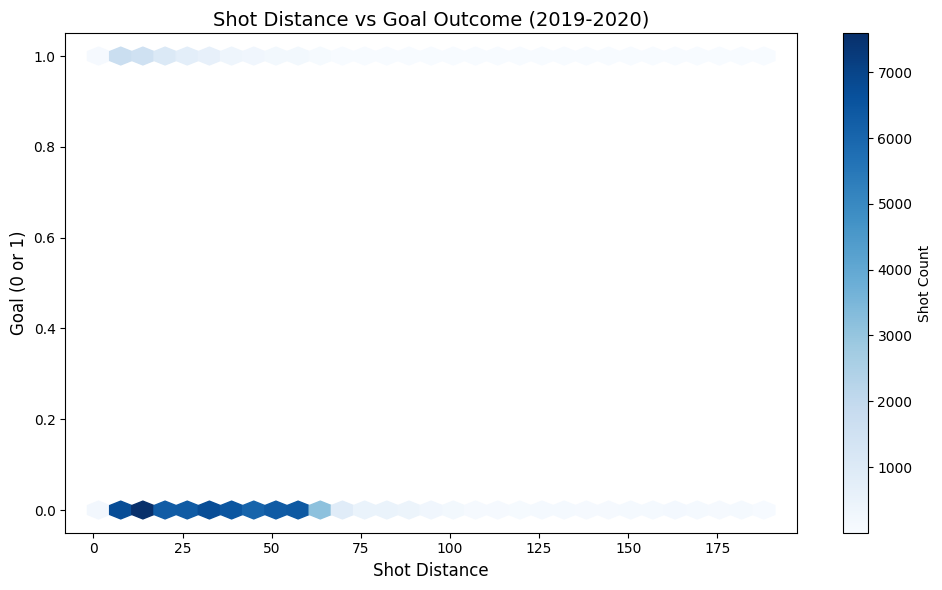

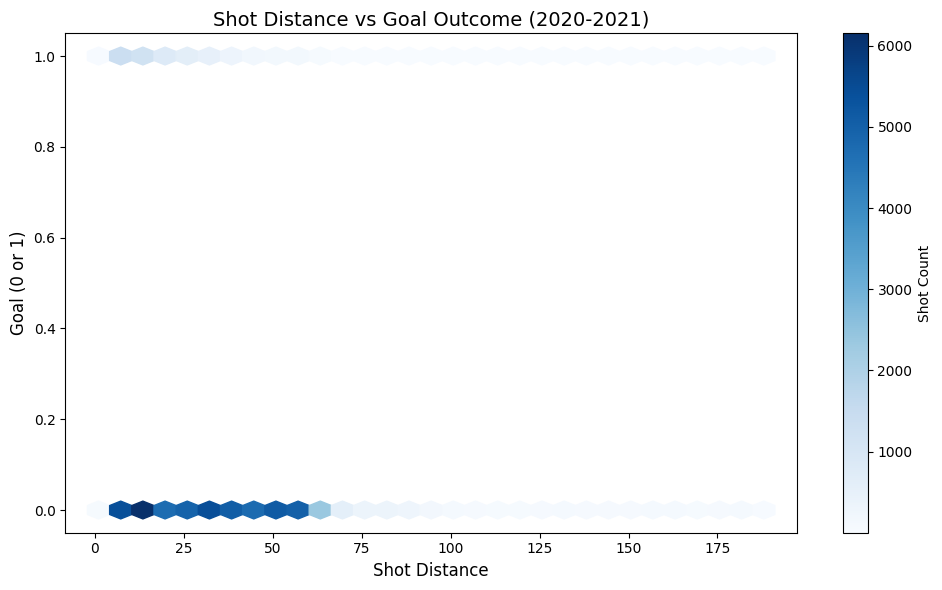

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract the year from 'gameId' and convert to integer
df['year'] = df['gameId'].astype(str).str[:4].astype(int)

# Filter data for seasons between 2018-19 and 2020-21
df_filtered = df.loc[(df['year'] >= 2018) & (df['year'] <= 2020)].copy()

# Ensure 'isGoal' is binary
df_filtered['isGoal'] = df_filtered['isGoal'].astype(int)

# Plot hexbin for each season
seasons = sorted(df_filtered['year'].unique())
for season in seasons:
    season_data = df_filtered[df_filtered['year'] == season]

    # Hexbin plot of shot distance vs isGoal
    plt.figure(figsize=(10, 6))
    plt.hexbin(
        season_data['shotDistance'],
        season_data['isGoal'],
        gridsize=30,
        cmap='Blues',
        mincnt=1
    )
    plt.colorbar(label='Shot Count')

    # Set plot labels and title
    plt.title(f'Shot Distance vs Goal Outcome ({season}-{season + 1})', fontsize=14)
    plt.xlabel('Shot Distance', fontsize=12)
    plt.ylabel('Goal (0 or 1)', fontsize=12)
    plt.tight_layout()

    # Display the plot
    plt.show()


**Question 3**

**Combine the information from the previous sections to produce a figure that shows the goal percentage (# goals / # shots) as a function of both distance from the net, and the category of shot types (you can pick a single season of your choice). Briefly discuss your findings; e.g. what might be the most dangerous types of shots?**



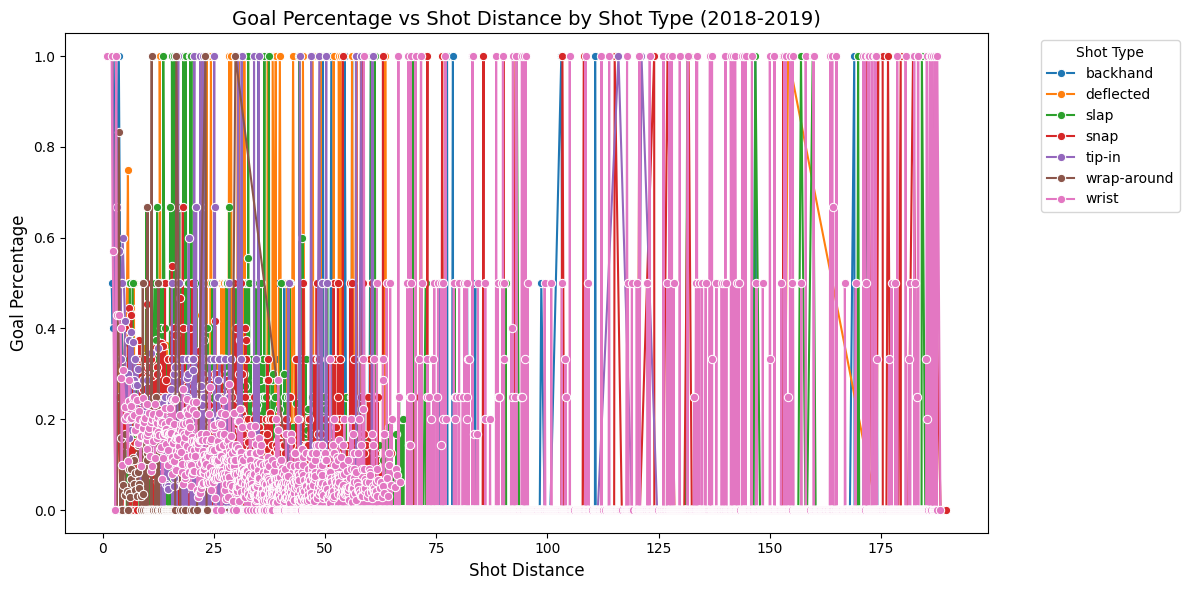

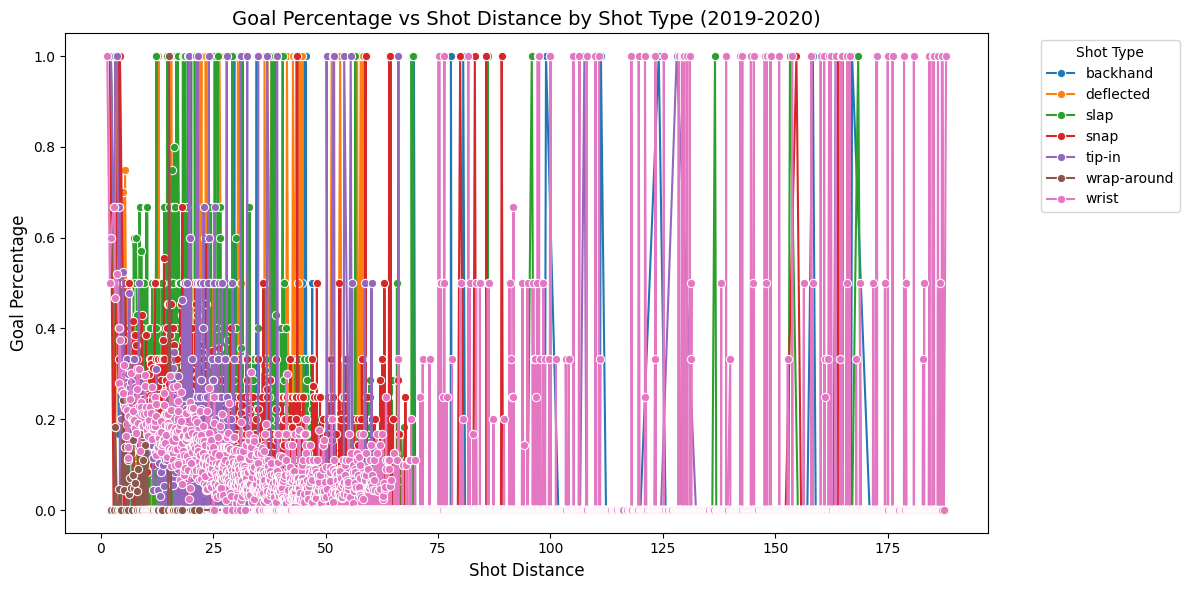

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract year from 'gameId' (first 4 characters)
df['year'] = df['gameId'].astype(str).str[:4].astype(int)

# Filter data for a range of seasons (2018-19 in this case)
df_filtered = df[(df['year'] >= 2018) & (df['year'] <= 2019)].copy()

# Ensure 'isGoal' is binary
df_filtered['isGoal'] = df_filtered['isGoal'].astype(int)

# Group by year, shot type, and shot distance to compute goal percentage
summary_data = df_filtered.groupby(['year', 'shotType', 'shotDistance']).agg(
    total_shots=('isGoal', 'count'),
    total_goals=('isGoal', 'sum')
).reset_index()

# Calculate goal percentage
summary_data['goal_percentage'] = summary_data['total_goals'] / summary_data['total_shots']

# Define seasons to plot (one per plot)
seasons = sorted(summary_data['year'].unique())

# Loop over each season and plot the goal percentage vs shot distance by shot type
for season in seasons:
    season_data = summary_data[summary_data['year'] == season]

    # Plotting with seaborn
    plt.figure(figsize=(12, 6))
    sns.lineplot(
        data=season_data,
        x='shotDistance',
        y='goal_percentage',
        hue='shotType',
        marker='o',
        palette='tab10'
    )

    # Set plot labels and title
    plt.title(f'Goal Percentage vs Shot Distance by Shot Type ({season}-{season + 1})', fontsize=14)
    plt.xlabel('Shot Distance', fontsize=12)
    plt.ylabel('Goal Percentage', fontsize=12)
    plt.legend(title='Shot Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()

    # Show the plot
    plt.show()


<ipython-input-22-55111ee2361f>:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df_2018_19.groupby(['distance_range', 'shotType']).agg(


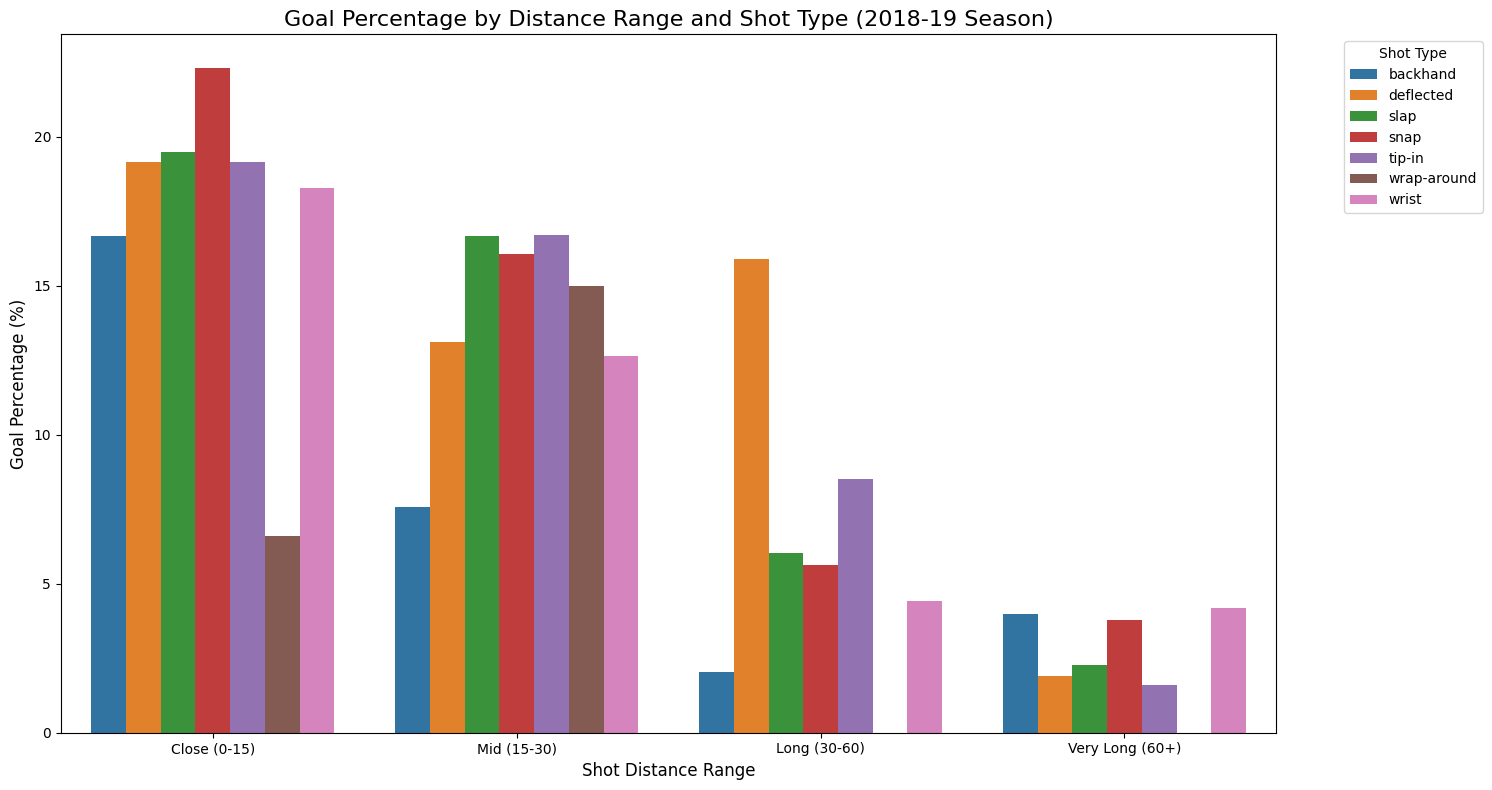

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the year from 'gameId'
df['year'] = df['gameId'].astype(str).str[:4].astype(int)

# Filter data for the 2018-19 season
df_2018_19 = df[df['year'] == 2018].copy()

# Ensure 'isGoal' is binary
df_2018_19['isGoal'] = df_2018_19['isGoal'].astype(int)

# Define shot distance ranges (bins)
distance_bins = [0, 15, 30, 60, 200]  # Close, Mid, Long, Very Long Range
distance_labels = ['Close (0-15)', 'Mid (15-30)', 'Long (30-60)', 'Very Long (60+)']

# Create a new column for binned shot distance
df_2018_19['distance_range'] = pd.cut(df_2018_19['shotDistance'], bins=distance_bins, labels=distance_labels)

# Group by shot type and distance range to compute goal percentage
summary = df_2018_19.groupby(['distance_range', 'shotType']).agg(
    total_shots=('isGoal', 'count'),
    total_goals=('isGoal', 'sum')
).reset_index()

# Calculate goal percentage
summary['goal_percentage'] = summary['total_goals'] / summary['total_shots'] * 100

# Plotting the goal percentage by distance range and shot type
plt.figure(figsize=(15, 8))
sns.barplot(data=summary, x='distance_range', y='goal_percentage', hue='shotType', palette='tab10')

# Set plot labels and title
plt.title('Goal Percentage by Distance Range and Shot Type (2018-19 Season)', fontsize=16)
plt.xlabel('Shot Distance Range', fontsize=12)
plt.ylabel('Goal Percentage (%)', fontsize=12)
plt.legend(title='Shot Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Display the plot
plt.show()


<ipython-input-24-d18b8b1f81ce>:31: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = summary.pivot_table(values='goal_percentage', index='shotType', columns='distance_range')


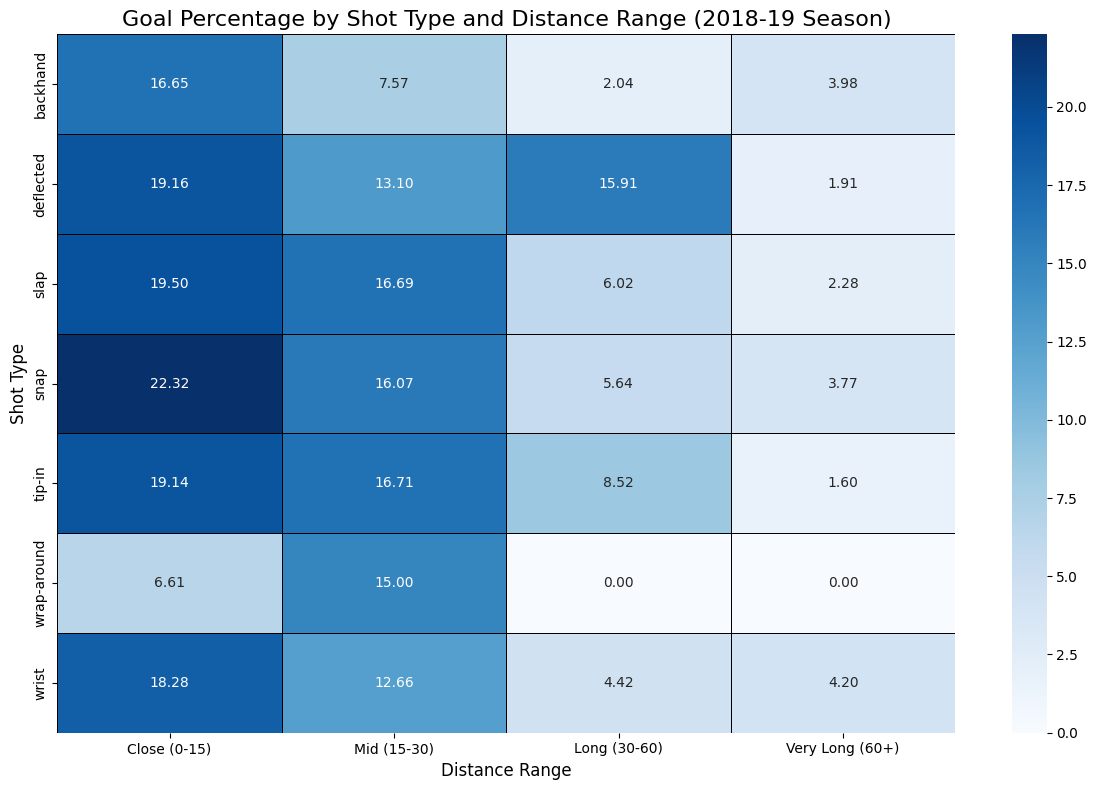

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the year from 'gameId' (first 4 characters)
df['year'] = df['gameId'].astype(str).str[:4].astype(int)

# Filter data for the 2018-19 season
df_2018_19 = df[df['year'] == 2018].copy()

# Ensure 'isGoal' is binary
df_2018_19['isGoal'] = df_2018_19['isGoal'].astype(int)

# Define shot distance ranges (bins)
distance_bins = [0, 15, 30, 60, 200]  # Close, Mid, Long, Very Long Range
distance_labels = ['Close (0-15)', 'Mid (15-30)', 'Long (30-60)', 'Very Long (60+)']

# Create a new column for binned shot distance
df_2018_19['distance_range'] = pd.cut(df_2018_19['shotDistance'], bins=distance_bins, labels=distance_labels)

# Group by shot type and distance range to compute goal percentage
summary = df_2018_19.groupby(['distance_range', 'shotType'], observed=True).agg(
    total_shots=('isGoal', 'count'),
    total_goals=('isGoal', 'sum')
).reset_index()

# Calculate goal percentage
summary['goal_percentage'] = summary['total_goals'] / summary['total_shots'] * 100

# Use pivot_table to reshape the data for heatmap visualization
heatmap_data = summary.pivot_table(values='goal_percentage', index='shotType', columns='distance_range')

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5, linecolor='black')

# Set plot labels and title
plt.title('Goal Percentage by Shot Type and Distance Range (2018-19 Season)', fontsize=16)
plt.xlabel('Distance Range', fontsize=12)
plt.ylabel('Shot Type', fontsize=12)
plt.tight_layout()

# Display the plot
plt.show()
